In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('train_COMPETITION.csv')

In [3]:
test_df=pd.read_csv('test_COMPETITION.csv')

In [4]:
test_df

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,15831,0,tcp,http,REJ,0,0,0,0,0,...,236,1.00,0.00,0.09,0.01,0.0,0.0,1.0,0.07,21
1,12617,0,tcp,ftp_data,SF,151,0,0,0,0,...,37,0.33,0.07,0.33,0.05,0.0,0.0,0.0,0.00,20
2,16328,0,udp,domain_u,SF,44,139,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,21
3,11403,0,tcp,http,SF,251,4014,0,0,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.00,21
4,11891,0,tcp,smtp,SF,1317,367,0,0,0,...,166,0.80,0.40,0.20,0.02,0.0,0.0,0.0,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,7222,0,tcp,private,S0,0,0,0,0,0,...,22,0.09,0.05,0.00,0.00,1.0,1.0,0.0,0.00,20
5747,9085,0,tcp,smtp,SF,2315,328,0,0,0,...,121,0.43,0.02,0.01,0.02,0.0,0.0,0.0,0.00,21
5748,22575,0,tcp,http,S0,0,0,0,0,0,...,25,0.10,0.05,0.00,0.00,1.0,1.0,0.0,0.00,19
5749,12005,0,tcp,http,SF,191,24802,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,21


In [5]:
train_df.head(5)

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,7060,0,tcp,smtp,SF,1129,327,0,0,0,...,1.00,0.00,0.14,0.02,0.0,0.04,0.0,0.01,21,0
1,22036,0,tcp,http,SF,242,2147,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
2,19555,0,tcp,http,SF,299,3991,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
3,11393,0,udp,domain_u,SF,43,133,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.00,0.0,0.00,21,0
4,22783,0,tcp,telnet,S0,0,0,0,0,0,...,0.14,0.19,0.05,0.00,0.1,0.67,0.0,0.00,4,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17251 entries, 0 to 17250
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           17251 non-null  int64  
 1   duration                     17251 non-null  int64  
 2   protocol_type                17251 non-null  object 
 3   service                      17251 non-null  object 
 4   flag                         17251 non-null  object 
 5   src_bytes                    17251 non-null  int64  
 6   dst_bytes                    17251 non-null  int64  
 7   land                         17251 non-null  int64  
 8   wrong_fragment               17251 non-null  int64  
 9   urgent                       17251 non-null  int64  
 10  hot                          17251 non-null  int64  
 11  num_failed_logins            17251 non-null  int64  
 12  logged_in                    17251 non-null  int64  
 13  num_compromised 

In [7]:
train_df['Class'].unique()

array([0, 1], dtype=int64)

In [8]:
train_df['level'].unique()

array([21,  4, 18, 17, 19, 20,  8, 13, 15, 11, 12, 14, 10, 16,  1,  9,  7,
        6,  0,  5,  3,  2], dtype=int64)

<AxesSubplot:xlabel='Class', ylabel='count'>

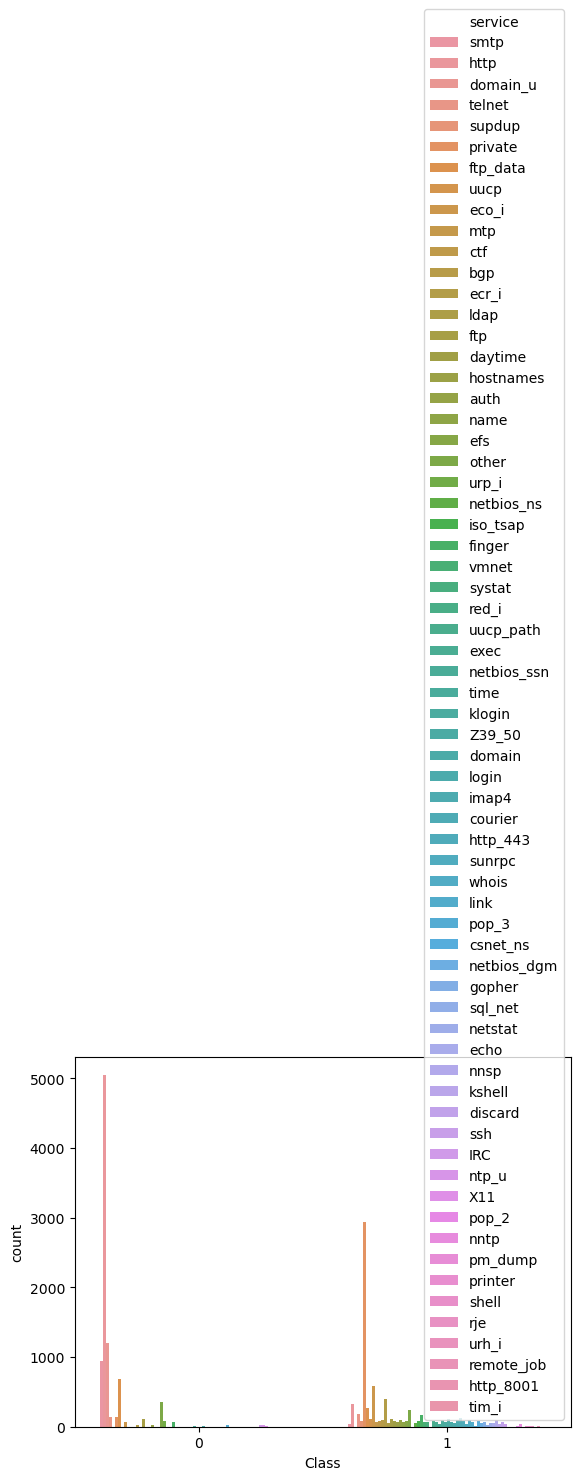

In [9]:
sns.countplot(x='Class',hue='service',data=train_df)  

<AxesSubplot:xlabel='level', ylabel='count'>

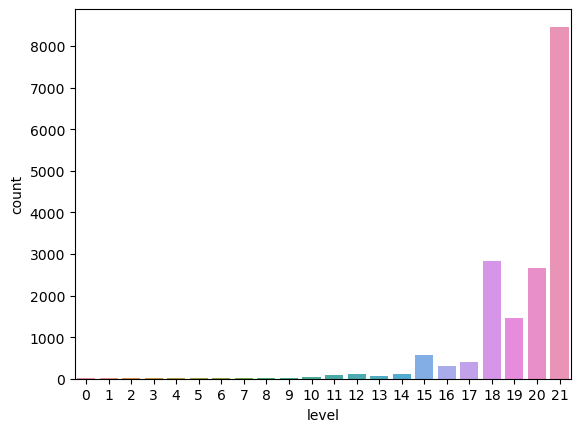

In [10]:
sns.countplot(x='level',data=train_df) 

<AxesSubplot:xlabel='protocol_type', ylabel='count'>

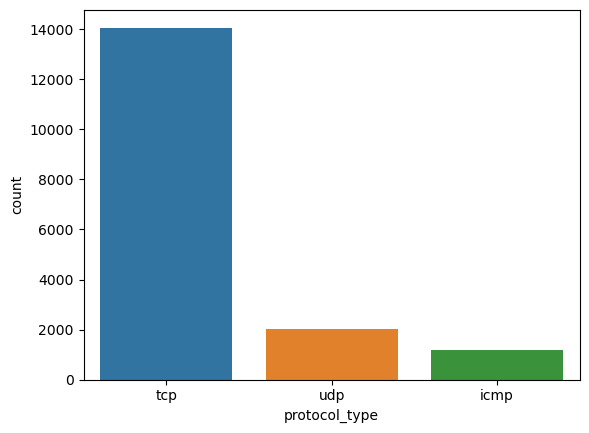

In [11]:
sns.countplot(x='protocol_type',data=train_df)

In [12]:
test_df.head(6)

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,15831,0,tcp,http,REJ,0,0,0,0,0,...,236,1.00,0.00,0.09,0.01,0.0,0.0,1.00,0.07,21
1,12617,0,tcp,ftp_data,SF,151,0,0,0,0,...,37,0.33,0.07,0.33,0.05,0.0,0.0,0.00,0.00,20
2,16328,0,udp,domain_u,SF,44,139,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,21
3,11403,0,tcp,http,SF,251,4014,0,0,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.00,0.00,21
4,11891,0,tcp,smtp,SF,1317,367,0,0,0,...,166,0.80,0.40,0.20,0.02,0.0,0.0,0.00,0.00,21
5,21506,0,tcp,pop_3,SF,38,130,0,0,0,...,4,0.02,0.05,0.01,0.50,0.0,0.0,0.01,0.00,20


In [13]:
test_df.duration.unique()

array([    0,  1031,     1, 27401,    63,     9,     2,    81,     3,
          12,  3735,     6,     8,    36, 41802, 38977,     5,    43,
        2178, 12096,    13,    15,    24,    29,    58, 10774,     4,
          11,  4382,  7232,  1334,  4641,    26, 38314,    27,    19,
         207,  2052,   210, 29053,  1525, 21263, 21866, 12753,  7790,
        4474,    31,  7070,   915, 32038,  9375, 13904,  3355,   639,
       27241,    20, 17904, 12666,    10,     7,   642,   666,  1714,
         156,  5065,   299,  1079,   132,  2603, 13500,  3924, 38657,
        4535,   113,  8835, 14680,  5784,    25, 12683,   560,    14,
       18438, 25910,  7701,    23,   524,  2005,  2448, 10009,    21,
        4129,  2467,    98,    55,  2671,    28,   770,    32, 22841,
        2629,  7805, 36613, 22861,  6214, 37668,  2035, 17833,  9052,
         131,    78,    41, 32244, 31601,  8359,  2099,  5385, 36700,
          96, 39602, 22741,  5046,   323,  1990,  5300,  8048,   667,
       27481,   618,

In [14]:
train_df.drop('ID',axis=1,inplace=True)

In [15]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,tcp,smtp,SF,1129,327,0,0,0,0,...,1.00,0.00,0.14,0.02,0.0,0.04,0.0,0.01,21,0
1,0,tcp,http,SF,242,2147,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
2,0,tcp,http,SF,299,3991,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
3,0,udp,domain_u,SF,43,133,0,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.00,0.0,0.00,21,0
4,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.14,0.19,0.05,0.00,0.1,0.67,0.0,0.00,4,0


In [16]:
test_df.drop('ID',axis=1,inplace=True)

In [17]:
test_df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,tcp,http,REJ,0,0,0,0,0,0,...,236,1.00,0.00,0.09,0.01,0.0,0.0,1.0,0.07,21
1,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,37,0.33,0.07,0.33,0.05,0.0,0.0,0.0,0.00,20
2,0,udp,domain_u,SF,44,139,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,21
3,0,tcp,http,SF,251,4014,0,0,0,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.00,21
4,0,tcp,smtp,SF,1317,367,0,0,0,0,...,166,0.80,0.40,0.20,0.02,0.0,0.0,0.0,0.00,21


In [18]:
train_df['protocol_type'] = train_df['protocol_type'].astype('category')
train_df['service'] = train_df['service'].astype('category')
train_df['flag'] = train_df['flag'].astype('category')
test_df['protocol_type'] = test_df['protocol_type'].astype('category')
test_df['service'] = test_df['service'].astype('category')
test_df['flag'] = test_df['flag'].astype('category')

In [19]:
train_df['protocol_type_cat'] = train_df['protocol_type'].cat.codes
train_df['service_cat'] = train_df['service'].cat.codes
train_df['flag_cat'] = train_df['flag'].cat.codes
test_df['protocol_type_cat'] = test_df['protocol_type'].cat.codes
test_df['service_cat'] = test_df['service'].cat.codes
test_df['flag_cat'] = test_df['flag'].cat.codes

In [20]:
train_df.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class,protocol_type_cat,service_cat,flag_cat
0,0,tcp,smtp,SF,1129,327,0,0,0,0,...,0.02,0.0,0.04,0.0,0.01,21,0,1,51,9
1,0,tcp,http,SF,242,2147,0,0,0,0,...,0.00,0.0,0.00,0.0,0.00,21,0,1,22,9
2,0,tcp,http,SF,299,3991,0,0,0,0,...,0.00,0.0,0.00,0.0,0.00,21,0,1,22,9
3,0,udp,domain_u,SF,43,133,0,0,0,0,...,0.00,0.0,0.00,0.0,0.00,21,0,2,11,9


In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17251 entries, 0 to 17250
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   duration                     17251 non-null  int64   
 1   protocol_type                17251 non-null  category
 2   service                      17251 non-null  category
 3   flag                         17251 non-null  category
 4   src_bytes                    17251 non-null  int64   
 5   dst_bytes                    17251 non-null  int64   
 6   land                         17251 non-null  int64   
 7   wrong_fragment               17251 non-null  int64   
 8   urgent                       17251 non-null  int64   
 9   hot                          17251 non-null  int64   
 10  num_failed_logins            17251 non-null  int64   
 11  logged_in                    17251 non-null  int64   
 12  num_compromised              17251 non-null  int64   
 13  r

In [22]:
test_df.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,protocol_type_cat,service_cat,flag_cat
0,0,tcp,http,REJ,0,0,0,0,0,0,...,0.09,0.01,0.0,0.0,1.0,0.07,21,1,22,1
1,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.33,0.05,0.0,0.0,0.0,0.00,20,1,19,9
2,0,udp,domain_u,SF,44,139,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,21,2,11,9
3,0,tcp,http,SF,251,4014,0,0,0,0,...,0.00,0.01,0.0,0.0,0.0,0.00,21,1,22,9


In [23]:
train_df.drop(['protocol_type','service','flag'],axis=1,inplace=True)

In [24]:
train_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class,protocol_type_cat,service_cat,flag_cat
0,0,1129,327,0,0,0,0,0,1,0,...,0.02,0.00,0.04,0.0,0.01,21,0,1,51,9
1,0,242,2147,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.0,0.00,21,0,1,22,9
2,0,299,3991,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.0,0.00,21,0,1,22,9
3,0,43,133,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,21,0,2,11,9
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.10,0.67,0.0,0.00,4,0,1,57,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17246,0,162,19994,0,0,0,0,0,1,0,...,0.04,0.07,0.00,0.0,0.00,21,0,1,22,9
17247,0,44,80,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,20,0,2,11,9
17248,3,705,329,0,0,0,0,0,1,0,...,0.01,0.00,0.00,0.0,0.00,21,0,1,51,9
17249,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.0,0.00,18,1,1,2,5


In [25]:
test_df.drop(['protocol_type','service','flag'],axis=1,inplace=True)

In [26]:
test_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,protocol_type_cat,service_cat,flag_cat
0,0,0,0,0,0,0,0,0,0,0,...,0.09,0.01,0.0,0.0,1.0,0.07,21,1,22,1
1,0,151,0,0,0,0,0,0,0,0,...,0.33,0.05,0.0,0.0,0.0,0.00,20,1,19,9
2,0,44,139,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.00,21,2,11,9
3,0,251,4014,0,0,0,0,0,1,0,...,0.00,0.01,0.0,0.0,0.0,0.00,21,1,22,9
4,0,1317,367,0,0,0,0,0,1,0,...,0.20,0.02,0.0,0.0,0.0,0.00,21,1,49,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.0,1.0,0.0,0.00,20,1,44,5
5747,0,2315,328,0,0,0,0,0,1,0,...,0.01,0.02,0.0,0.0,0.0,0.00,21,1,49,9
5748,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.0,1.0,0.0,0.00,19,1,22,5
5749,0,191,24802,0,0,0,0,0,1,0,...,0.00,0.00,0.0,0.0,0.0,0.00,21,1,22,9


In [27]:
x=train_df.drop('Class',axis=1)

In [28]:
x.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,protocol_type_cat,service_cat,flag_cat
0,0,1129,327,0,0,0,0,0,1,0,...,0.14,0.02,0.0,0.04,0.0,0.01,21,1,51,9
1,0,242,2147,0,0,0,0,0,1,0,...,0.00,0.00,0.0,0.00,0.0,0.00,21,1,22,9
2,0,299,3991,0,0,0,0,0,1,0,...,0.00,0.00,0.0,0.00,0.0,0.00,21,1,22,9


In [29]:
y=train_df['Class']

In [30]:
y.shape

(17251,)

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11558, 42), (5693, 42), (11558,), (5693,))

# MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
x_train_sca=pd.DataFrame(scaler.fit_transform(X_train))

In [37]:
x_test_sca=pd.DataFrame(scaler.transform(X_test))

In [38]:
x_train_sca.columns=X_train.columns

In [39]:
x_train_sca

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,protocol_type_cat,service_cat,flag_cat
0,0.0,6.811470e-07,0.000143,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.01,0.02,0.0,0.00,0.0,0.0,1.000000,0.5,0.338462,0.9
1,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1.0,1.00,0.0,0.0,0.904762,0.5,0.707692,0.5
2,0.0,1.126512e-07,0.000014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.0,1.000000,1.0,0.169231,0.9
3,0.0,7.964180e-07,0.006013,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.02,0.05,0.0,0.00,0.0,0.0,1.000000,0.5,0.338462,0.9
4,0.0,2.095837e-08,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00,0.56,0.0,0.00,0.0,0.0,0.761905,0.0,0.200000,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11553,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1.0,1.00,0.0,0.0,0.857143,0.5,0.107692,0.5
11554,0.0,6.235115e-07,0.001143,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.04,0.05,0.0,0.01,0.0,0.0,1.000000,0.5,0.338462,0.9
11555,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.00,1.0,1.0,1.000000,0.5,0.523077,0.1
11556,0.0,8.147566e-07,0.000216,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.00,0.0,0.00,0.0,0.0,1.000000,0.5,0.338462,0.9


In [40]:
x_test_sca.columns=X_test.columns

In [41]:
x_test_sca

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,protocol_type_cat,service_cat,flag_cat
0,0.000000,8.959703e-07,0.000553,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,0.00,0.00,0.00,0.0,0.00,0.0,1.000000,0.5,0.338462,0.9
1,0.000047,3.274745e-06,0.000476,0.0,0.0,0.0,0.933333,0.0,1.0,0.0,...,0.01,0.00,0.00,0.0,0.00,0.0,0.476190,0.5,0.276923,0.9
2,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00,0.00,0.08,0.0,0.83,1.0,0.952381,0.5,0.707692,0.1
3,0.000000,1.220825e-05,0.000072,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,0.25,0.02,0.00,0.0,0.00,0.0,1.000000,0.5,0.784615,0.9
4,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00,0.00,1.00,1.0,0.00,0.0,0.857143,0.5,0.507692,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5688,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.00,0.00,1.00,1.0,0.00,0.0,0.857143,0.5,1.000000,0.5
5689,0.328145,2.619796e-09,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,1.00,0.00,0.00,0.0,1.00,1.0,0.714286,0.5,0.630769,0.4
5690,0.000000,8.121368e-08,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.15,0.00,0.01,0.0,0.00,0.0,1.000000,1.0,0.169231,0.9
5691,0.000000,8.514337e-07,0.000562,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,...,0.02,0.01,0.00,0.0,0.00,0.0,1.000000,0.5,0.338462,0.9


In [42]:
test_df_scal=pd.DataFrame(scaler.transform(test_df))

In [43]:
test_df_scal.columns=test_df.columns

In [44]:
test_df_scal

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,protocol_type_cat,service_cat,flag_cat
0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.09,0.01,0.0,0.0,1.0,0.07,1.000000,0.5,0.338462,0.1
1,0.0,3.955892e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.33,0.05,0.0,0.0,0.0,0.00,0.952381,0.5,0.292308,0.9
2,0.0,1.152710e-07,0.000027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,1.000000,1.0,0.169231,0.9
3,0.0,6.575688e-07,0.000779,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.01,0.0,0.0,0.0,0.00,1.000000,0.5,0.338462,0.9
4,0.0,3.450272e-06,0.000071,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.20,0.02,0.0,0.0,0.0,0.00,1.000000,0.5,0.753846,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1.0,1.0,0.0,0.00,0.952381,0.5,0.676923,0.5
5747,0.0,6.064828e-06,0.000064,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.01,0.02,0.0,0.0,0.0,0.00,1.000000,0.5,0.753846,0.9
5748,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,1.0,1.0,0.0,0.00,0.904762,0.5,0.338462,0.5
5749,0.0,5.003811e-07,0.004815,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.00,1.000000,0.5,0.338462,0.9


# naive_bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
clf = GaussianNB()

In [47]:
clf.fit(x_train_sca,y_train)

GaussianNB()

In [48]:
y_pre=clf.predict(x_test_sca)

In [49]:
y_pre

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
pd.DataFrame({'predict value ':y_pre,'true value':y_test})

,predict value,true value
10866,0,0
8776,0,1
3975,1,1
5871,0,0
7974,1,1
...,...,...
13150,1,1
9611,1,1
14640,0,0
3724,0,0


In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuray_naive_bayes = accuracy_score(y_pre, y_test)
accuray_naive_bayes

0.8939047953627262

In [53]:
y_test_df=clf.predict(test_df_scal)

In [54]:
y_test_df

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [55]:
y_test_df = pd.DataFrame(y_test_df)

In [56]:
y_test_df

,0
0,1
1,0
2,0
3,0
4,0
...,...
5746,1
5747,0
5748,1
5749,0


In [57]:
y_test_df.to_csv('naive_bayes.csv')

# LogisticRegression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression(random_state=42)

In [60]:
model.fit(x_train_sca,y_train)

LogisticRegression(random_state=42)

In [61]:
y_pre2=model.predict(x_test_sca)

In [62]:
pd.DataFrame({'predict value ':y_pre2,'true value':y_test})

,predict value,true value
10866,0,0
8776,1,1
3975,1,1
5871,0,0
7974,1,1
...,...,...
13150,1,1
9611,1,1
14640,0,0
3724,0,0


In [63]:
accuray_LogisticRegression = accuracy_score(y_pre, y_test)
accuray_LogisticRegression

0.8939047953627262

In [64]:
y_test_df2=model.predict(test_df_scal)

In [65]:
y_test_df2 = pd.DataFrame(y_test_df2)

In [66]:
y_test_df2

,0
0,0
1,0
2,0
3,0
4,0
...,...
5746,1
5747,0
5748,1
5749,0


In [67]:
y_test_df2.to_csv('LogisticRegression.csv')

# Neighbors

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
model2=KNeighborsClassifier(n_neighbors=3)

In [70]:
model2.fit(x_train_sca,y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
y_pre3=model2.predict(x_test_sca)

In [72]:
pd.DataFrame({'predict value ':y_pre3,'true value':y_test})

,predict value,true value
10866,0,0
8776,1,1
3975,1,1
5871,0,0
7974,1,1
...,...,...
13150,1,1
9611,1,1
14640,0,0
3724,0,0


In [73]:
accuray_neighbors = accuracy_score(y_pre3, y_test)
accuray_neighbors

0.9956086421921658

In [74]:
y_test_df3=model2.predict(test_df_scal)

In [75]:
y_test_df3 = pd.DataFrame(y_test_df3)

In [76]:
y_test_df3.to_csv('KNeighbors.csv')

# DecisionTreeClassifier

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
model3=DecisionTreeClassifier(random_state=42)

In [79]:
model3.fit(x_train_sca,y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
y_pre4=model3.predict(x_test_sca)

In [81]:
x_test_sca.shape

(5693, 42)

In [82]:
y_pre4.shape

(5693,)

In [83]:
y_test.shape

(5693,)

In [84]:
pd.DataFrame({'Pre':y_pre4,'true value ':y_test})

,Pre,true value
10866,0,0
8776,1,1
3975,1,1
5871,0,0
7974,1,1
...,...,...
13150,1,1
9611,1,1
14640,0,0
3724,0,0


In [85]:
accuray_DecisionTree = accuracy_score(y_pre3, y_test)
accuray_DecisionTree

0.9956086421921658

In [86]:
y_test_df4=model3.predict(test_df_scal)

In [87]:
y_test_df4 = pd.DataFrame(y_test_df4)

In [88]:
y_test_df4.to_csv('DecisionTree.csv')

# RandomForestClassifier

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model4=RandomForestClassifier(n_estimators=5,random_state=42)

In [91]:
model4.fit(x_train_sca,y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [92]:
y_pre5=model4.predict(x_test_sca)

In [93]:
pd.DataFrame({'Pre':y_pre5,'true value ':y_test})

,Pre,true value
10866,0,0
8776,1,1
3975,1,1
5871,0,0
7974,1,1
...,...,...
13150,1,1
9611,1,1
14640,0,0
3724,0,0


In [94]:
accuray_RandomForest = accuracy_score(y_pre3, y_test)
accuray_RandomForest

0.9956086421921658

In [95]:
y_test_df5=model4.predict(test_df_scal)
y_test_df5 = pd.DataFrame(y_test_df5)
y_test_df5.to_csv('RandomForest.csv')

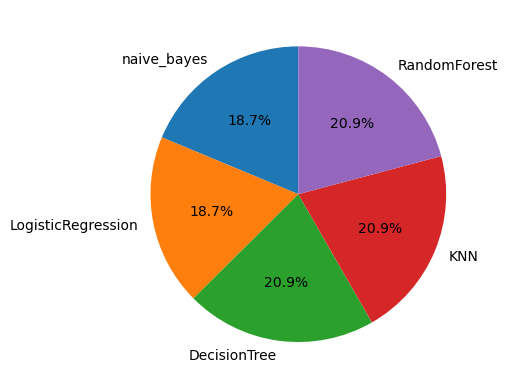

In [96]:
acc = np.array([accuray_naive_bayes, accuray_LogisticRegression, accuray_DecisionTree, accuray_neighbors,accuray_RandomForest])
mylabels = ["naive_bayes", "LogisticRegression", "DecisionTree", "KNN","RandomForest"]
plt.pie(acc,labels=mylabels,startangle=90,autopct='%1.1f%%')
plt.show() 